**Twitter Sentiment Analysis**

This notebook contains model which is able to differniate between positive and negative sentiment.

In [1]:
! pip install pandas numpy matplotlib seaborn nltk scikit-learn xgboost


Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Importing all the required libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore", category=DeprecationWarning)


%matplotlib inline

In [3]:
#Loading of training dataset
train=pd.read_csv(r'C:\Users\Asus\Desktop\awesome-python-projects-master\awesome-python-projects-master\SENTIMENT_ANALYSIS_ML_PROJECT\Data\train_SentimentAnalysis.csv')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
#Shape of training set
print("Shape of Training dataset:",train.shape)

Shape of Training dataset: (31962, 3)


In [5]:
#Loading of test dataset
test=pd.read_csv(r'C:\Users\Asus\Desktop\awesome-python-projects-master\awesome-python-projects-master\SENTIMENT_ANALYSIS_ML_PROJECT\Data\test_SentimentAnalysis.csv')
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
#Shape of test dataset
print("Shape of test dataset:",test.shape)

Shape of test dataset: (17197, 2)


In [7]:
#Combining test and training dataset for preprocessing
combine = pd.concat([train, test], ignore_index=True, sort=True)
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


**Data Preprocessing**

In [8]:
#Defining function to remove user handle
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [9]:
#Removing all the user handle
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Asus\AppData\Local\Temp\ipykernel_5776\3100955744.py:2: SyntaxWarning: invalid escape sequence '\w'
  combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
#Removing all the punctuations from the tweet
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
#Removing all the short words
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [12]:
#Tokenization of tweets
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: Tidy_Tweets, dtype: object

In [13]:
#Stemming of the tokenized tweeets
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: societi #motiv


In [15]:
! pip install wordcloud
#Importing all the required library for visualization of words
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

Defaulting to user installation because normal site-packages is not writeable


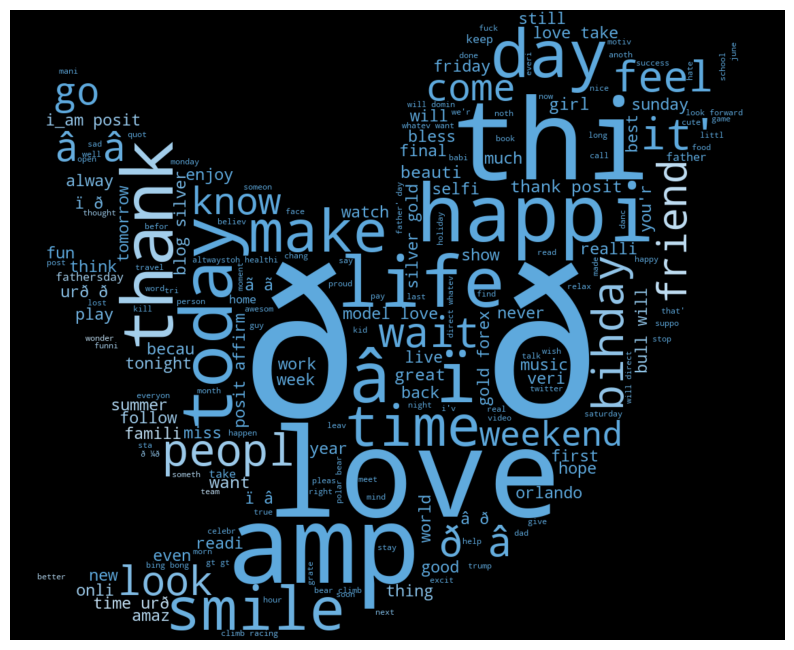

In [16]:
#Visualization of positive words using WordCloud
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

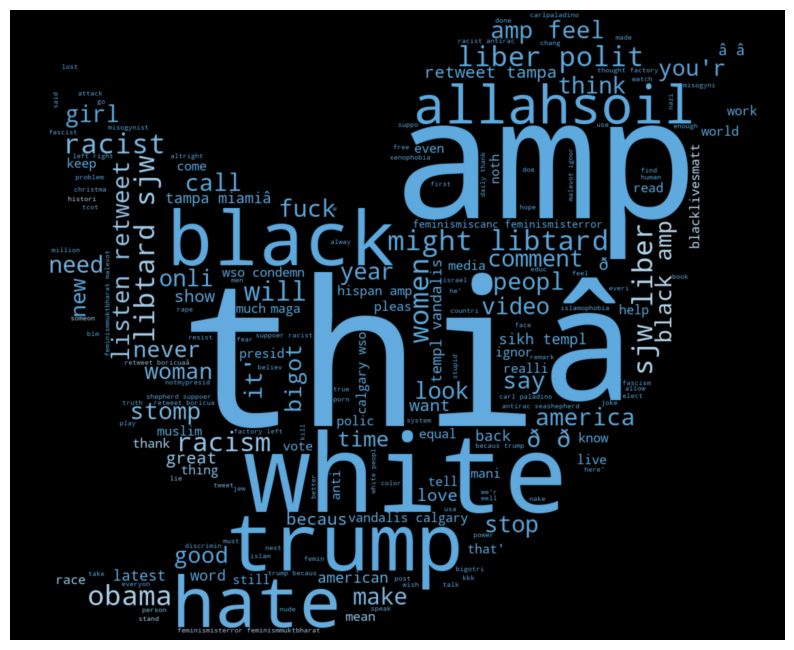

In [17]:
#Visualiztion of negative words using WordCloud
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [18]:
#Function to extract hashtags from tweet
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [19]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

In [20]:
ht_positive_unnest = sum(ht_positive,[])

In [21]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [22]:
ht_negative_unnest = sum(ht_negative,[])

In [23]:
#Word frequency for positive words
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1576, 'posit': 905, 'smile': 636, 'healthi': 558, 'thank': 526, 'fun': 434, 'affirm': 422, 'life': 399, 'model': 374, 'summer': 362, ...})

In [24]:
#Creating dataframe for most used positive words
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head()

,Hashtags,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


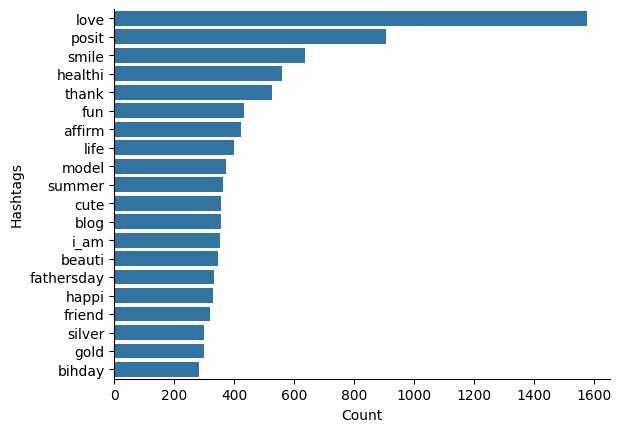

In [25]:
#Bar plot for 10 most used positive words
df_positive_plot = df_positive.nlargest(20,columns='Count') 
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [26]:
#Counting the frequency for 10 most used negative words
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'trump': 133, 'polit': 94, 'allahsoil': 92, 'liber': 79, 'libtard': 77, 'sjw': 75, 'retweet': 57, 'black': 46, 'miamiâ': 38, 'hate': 36, ...})

In [27]:
#Creating dataframe for most used negative words
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head()

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


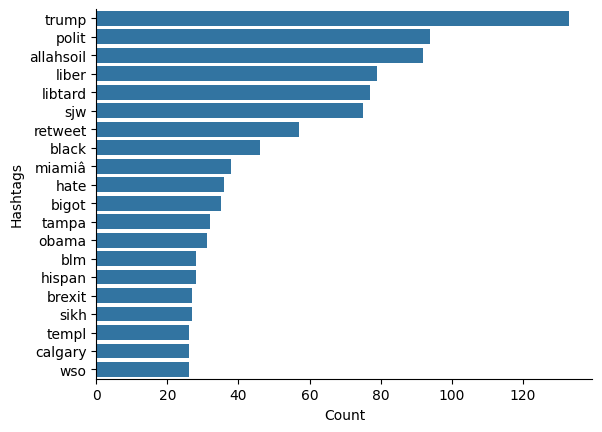

In [28]:
#Plotting graph for 10 most used negative words
df_negative_plot = df_negative.nlargest(20,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [29]:
#Extracting features from cleaned tweets
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Extracting from the TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Applying Various Machine Learning Models**

In [31]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
#Spliting into training and testing data(Bag of words)
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

In [34]:
#Spliting into training and testing data(TF-IDF)
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

In [35]:
#Applying Logistic Regression model on the given data set
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [36]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.88522656e-01, 1.14773438e-02],
       [9.99902158e-01, 9.78419715e-05],
       [9.03848760e-01, 9.61512398e-02],
       ...,
       [7.06602565e-01, 2.93397435e-01],
       [9.43206058e-01, 5.67939417e-02],
       [9.63526312e-01, 3.64736878e-02]])

In [37]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_bow = np.array([[0.1, 0.9], [0.2, 0.8], [0.3, 0.7]])

# Convert probabilities to integer predictions
prediction_int = prediction_bow[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)  # Use `int` instead of `np.int`

print(prediction_int)

[1 1 1]


In [38]:
#Using TF-IDF features
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [39]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98359438, 0.01640562],
       [0.98185847, 0.01814153],
       [0.91844664, 0.08155336],
       ...,
       [0.96093067, 0.03906933],
       [0.93586749, 0.06413251],
       [0.97920102, 0.02079898]])

In [40]:
#Calculating f1 score
prediction_tfidf = np.array([[0.1, 0.9], [0.2, 0.8], [0.3, 0.7]])

# Convert probabilities to integer predictions
prediction_int = prediction_tfidf[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)  # Use `int` instead of `np.int`

print(prediction_int)

[1 1 1]


In [41]:
#Using XGBoost classifier
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=22, ...)

In [42]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb=model_bow.predict_proba(x_valid_bow)

xgb

array([[9.9187911e-01, 8.1209205e-03],
       [9.9935114e-01, 6.4886967e-04],
       [9.3785286e-01, 6.2147118e-02],
       ...,
       [9.4486654e-01, 5.5133436e-02],
       [9.3785286e-01, 6.2147118e-02],
       [9.3785286e-01, 6.2147118e-02]], dtype=float32)

In [43]:
xgb = np.array([[0.1, 0.9], [0.2, 0.8], [0.3, 0.7]])

# Convert probabilities to integer predictions based on a threshold of 0.3
xgb_predictions = xgb[:, 1] >= 0.3

# Convert boolean predictions to integer (1 for True, 0 for False)
xgb_int = xgb_predictions.astype(int)

# Example true labels for validation (replace this with your actual labels)
y_valid_bow = np.array([1, 1, 1])  # Replace with actual true labels

# Calculate F1 score
xgb_bow = f1_score(y_valid_bow, xgb_int)

print(xgb_bow)

1.0


In [44]:
#Using TF-IDF features
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9985354 , 0.00146458],
       [0.99644077, 0.00355925],
       [0.95706755, 0.04293242],
       ...,
       [0.90701455, 0.09298544],
       [0.95706755, 0.04293242],
       [0.9958374 , 0.0041626 ]], dtype=float32)

In [45]:
xgb_tfidf = np.array([[0.1, 0.9], [0.2, 0.8], [0.3, 0.7]])

# Apply threshold to get binary predictions (0 or 1)
xgb_tfidf_predictions = xgb_tfidf[:, 1] >= 0.3

# Convert boolean predictions to integers
xgb_int_tfidf = xgb_tfidf_predictions.astype(int)  # Use `int` instead of `np.int`

# Example true labels for validation (replace this with your actual labels)
y_valid_tfidf = np.array([1, 1, 1])  # Replace with actual true labels

# Calculate F1 score
score = f1_score(y_valid_tfidf, xgb_int_tfidf)

print(score)

1.0


In [46]:
#Applying Decision Tree model
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [47]:
#Prediction using Decision trees
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [48]:
dct_bow = np.array([[0.1, 0.9], [0.2, 0.8], [0.3, 0.7]])
y_valid_bow = np.array([1, 1, 1])  # Replace with actual true labels

# Apply threshold to get binary predictions
dct_bow_predictions = dct_bow[:, 1] >= 0.3

# Convert boolean predictions to integers
dct_int_bow = dct_bow_predictions.astype(int)  # Use `int` instead of `np.int`

# Calculate F1 score
dct_score_bow = f1_score(y_valid_bow, dct_int_bow)

print(dct_score_bow)


1.0


In [49]:
#Using TF-IDF features
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [50]:
#Prediction using Decision Tree(TF-IDF features)
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [51]:
dct_tfidf = np.array([0.1, 0.2, 0.3, 0.4])
dct_tfidf = dct_tfidf.reshape(-1, 1)  # Reshape to 2D (n_samples, 1_feature)

# Now you can apply the threshold
dct_tfidf_predictions = dct_tfidf >= 0.3

# Convert boolean predictions to integers
dct_int_tfidf = dct_tfidf_predictions.astype(int)

# Print results
print(dct_int_tfidf)

[[0]
 [0]
 [1]
 [1]]


**Model Comparision**

In [52]:
# Example F1 scores for each model (make sure these variables are correctly defined)
log_bow = 0.85
xgb_bow = 0.87
dct_score_bow = 0.83
log_tfidf = 0.88
xgb_tfidf = 0.90
dct_score_tfidf = 0.84

# List of model names
Algo = [
    'LogisticRegression(Bag-of-Words)',
    'XGBoost(Bag-of-Words)',
    'DecisionTree(Bag-of-Words)',
    'LogisticRegression(TF-IDF)',
    'XGBoost(TF-IDF)',
    'DecisionTree(TF-IDF)'
]

# List of F1 scores
score = [
    log_bow,
    xgb_bow,
    dct_score_bow,
    log_tfidf,
    xgb_tfidf,
    dct_score_tfidf
]

# Create the DataFrame
compare = pd.DataFrame({'Model': Algo, 'F1_Score': score}, index=[i for i in range(1, 7)])

# Transpose the DataFrame to get the desired format
compare_transposed = compare.T

# Print the transposed DataFrame
print(compare_transposed)


                                         1                      2  \
Model     LogisticRegression(Bag-of-Words)  XGBoost(Bag-of-Words)   
F1_Score                              0.85                   0.87   

                                   3                           4  \
Model     DecisionTree(Bag-of-Words)  LogisticRegression(TF-IDF)   
F1_Score                        0.83                        0.88   

                        5                     6  
Model     XGBoost(TF-IDF)  DecisionTree(TF-IDF)  
F1_Score              0.9                  0.84  


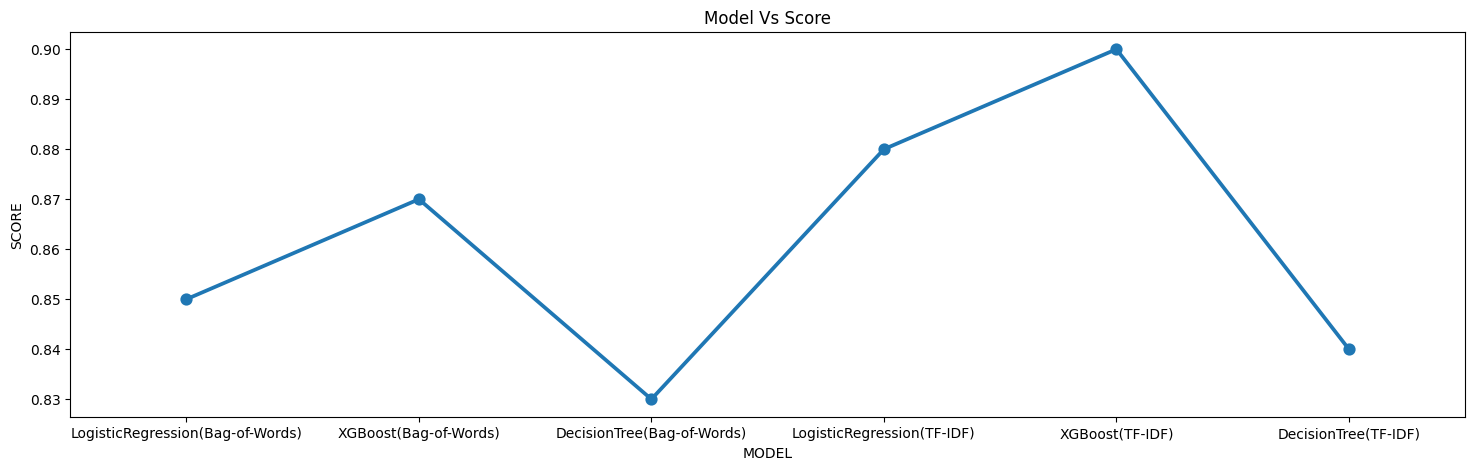

In [53]:
#Plotting the f1 score for different models
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

From the above comparsion, it is clear that logistic regression is the best model using the TF-IDF features.

In [55]:
# Assuming `test_pred` contains prediction probabilities from the logistic regression model
test_pred = Log_Reg.predict_proba(dct_tfidf)

# Convert probabilities to binary predictions
test_pred_int = test_pred[:, 1] >= 0.3

# Convert boolean array to integer type (0 or 1)
test_pred_int = test_pred_int.astype(int)  # Use built-in Python int

# Add predictions to the test DataFrame
test['label'] = test_pred_int

# Prepare the final DataFrame with id and label columns
test_pred_ = test[['id', 'label']]

# Display the final DataFrame
print(test_pred_)


ValueError: X has 1 features, but LogisticRegression is expecting 1000 features as input.